# Машинное обучение

ML - решает задачу:

    Требуется подогнать заданный набор точек с данными под соответствующую функцию (отображение входа на выход), которая улавливает важные сигналы данных и игнорирует помехи, а затем убедиться, что на новых даннных функция работает хорошо.

**ML бывает:**

Обучение с учителем

Обучение без учителя

**Обучение с учителем (Supervised Learning)**

Моделируют отношение между признаками (features) и метками (labels). Такие модели служат для предсказания меток на основе размеченных обучающих данных. После обучения модель можно использовать для присвоения меток новым, ранее неизвестным данным.

Типы задач:

* Классификация (метки — дискретные значения: два или более класса).

Пример: Определение спама в письмах.

* Регрессия (метки — непрерывные величины).

Пример: Прогнозирование цены дома.

**Обучение без учителя (Unsupervised Learning)**

Моделируют структуру данных без использования меток. Такие методы выявляют скрытые закономерности в немаркированных данных.

Типы задач:

* Кластеризация (выделение отдельных групп данных).
Пример: Сегментация клиентов по поведению.

* Понижение размерности (поиск компактного представления данных).
Пример: PCA для визуализации многомерных данных.

**Обучение с подкреплением (Reinforcement Learning)**

Метод, при котором система (агент) обучается через взаимодействие со средой, получая обратную связь в виде сигналов вознаграждения. Эти сигналы показывают, насколько успешно агент выполняет поставленную задачу. Конечное вознаграждение не обязательно достигает максимального значения.

In [39]:
import seaborn as sns

iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [41]:
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [45]:
print(iris.values.shape)

(150, 5)


In [47]:
print(iris.index)

RangeIndex(start=0, stop=150, step=1)



**Строки** - отдельные объекты - образцы (sample)

**Столбы** - признаки (features) - соответствуют конкретным наблюдениям

**Матрицы признаков** (features matrix) размер [число образцов x число признаков]

**Целевой массив, массив меток (targets)** - одноменый массив [1 x число образцов] - данные, которые мы хотим предсказать на основе имеющихся данных

Зависимые (метка) и независимые переменные (признаки)

**Процесс построения системы машинного обучения:**

1. Предварительная обработка данных
* Вход: Необработанные данные (сырые признаки и метки)
* Выбор признаков (Feature Selection) - отбор наиболее информативных признаков для модели
* Масштабирование признаков (Feature Scaling) - нормализация данных (например, MinMaxScaler, StandardScaler)
* Понижение размерности (Dimensionality Reduction) - методы: PCA, t-SNE для уменьшения количества признаков
* Разделение выборки (Train-Test Split) - разделение данных на обучающую и тестовую части (обычно 70/30 или 80/20)

2. Обучение модели
Основные этапы:

* Выбор модели (Model Selection). Подбор алгоритма (линейная регрессия, случайный лес, нейросети и др.)

* Кросс-валидация (Cross-Validation). Методы: k-fold, stratified для оценки устойчивости модели

* Оценка эффективности (Performance Metrics). Метрики качества: Для классификации: Accuracy, Precision, Recall, F1-score. Для регрессии: MSE, RMSE, R²

* Оптимизация гиперпараметров. Параметры которые получаются не из данных, а являются харктеристиками модели.

3. Оценка и формирование финальной модели
   
5. Прогнозирование (использование модели)

# SCiKit-learn #
1. Выбираем класс модели
2. Устанавливаем гиперпараметры модели
3. Создаем матрицу признаков и целевой массив
4. Обучение модели fit()
5. Применять модель к новым данным
    * predict() - с учителем
    * predict() или transform() - без учителя

# Обучение с учителем: Линейная регрессия #

Простая линейная регрессия:
y = ax + b

In [68]:
import matplotlib.pyplot as plt
import numpy as np

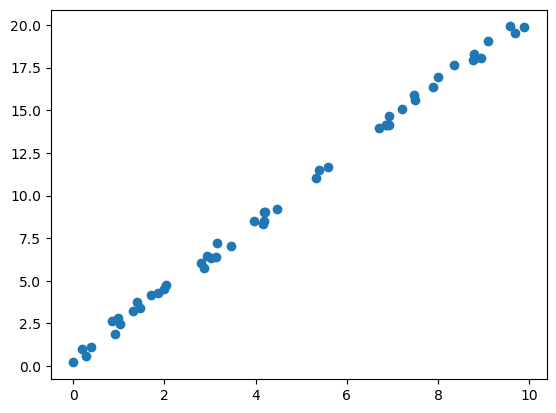

In [98]:
np.random.seed(1)
x = 10 * np.random.rand(50)
y = 2 * x + np.random.rand(50)

plt.scatter(x,y)
plt.show()

1.9929249358214043
-0.495676012882301


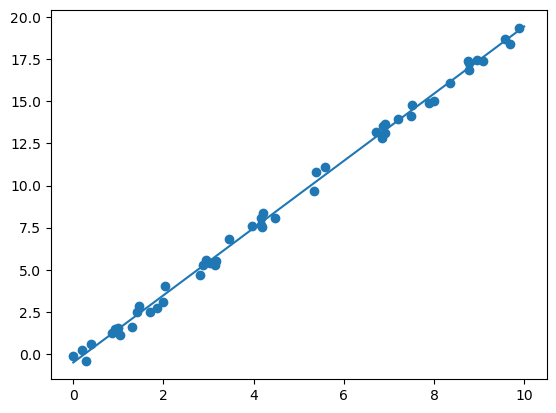

In [102]:
# 1. Выбираем класс модели
from sklearn.linear_model import LinearRegression

# 2. Устанавливаем гиперпараметры модели
model = LinearRegression()

# 3. Создаем матрицу признаков и целевой массив
X = x[:, np.newaxis]
y = 2 * x - 1 + np.random.rand(50)

# 4. Обучение модели fit()
model.fit(X,y)

# Получаем коэффициенты
# y = a1 * x + b
print(model.coef_[0])   # a1
print(model.intercept_) # b

x_ = np.linspace(0, 10, 30)
y_ = model.coef_[0] * x_ + model.intercept_

plt.plot(x_,y_)
plt.scatter(x,y)
plt.show()

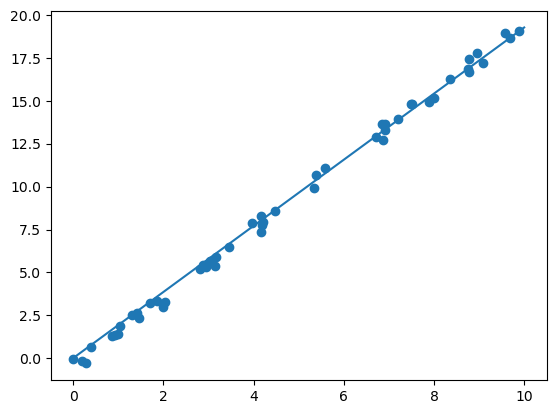

In [106]:
# Зададим гиперпараметр. Теперь линия проходит через точку 0,0
model = LinearRegression(fit_intercept=False)

X = x[:, np.newaxis]
y = 2 * x - 1 + np.random.rand(50)

model.fit(X,y)

x_ = np.linspace(0, 10, 30)
y_ = model.coef_[0] * x_ + model.intercept_
plt.plot(x_,y_)
plt.scatter(x,y)
plt.show()

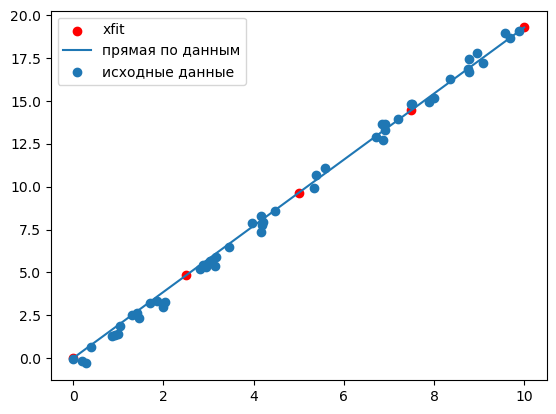

In [118]:
# 5. Применять модель к новым данным

xfit = np.linspace(0, 10, 5)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(xfit,yfit,c='r',label='xfit')
plt.plot(x_,y_,label='прямая по данным')
plt.scatter(x,y,label='исходные данные')
plt.legend()
plt.show()